In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Wide versus Narrow Data Format - Using Python

Let's take the example of a hypothetical Library, and look at the statistics the front desk might collect. For example the desk staff might use an online form such as the Google Form shown below, tallying stats for various enquiry types over a given time period, then submitting the form at the end of that time period.

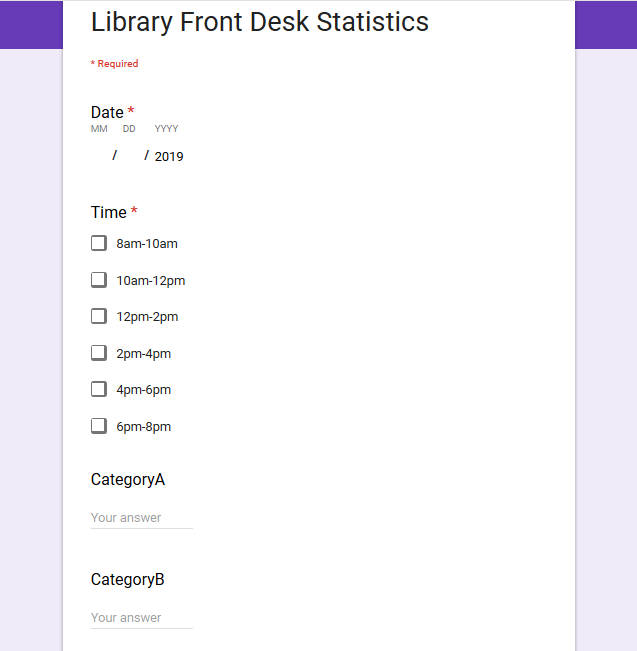

The form data is stored in a Google Spreadsheet shown below.

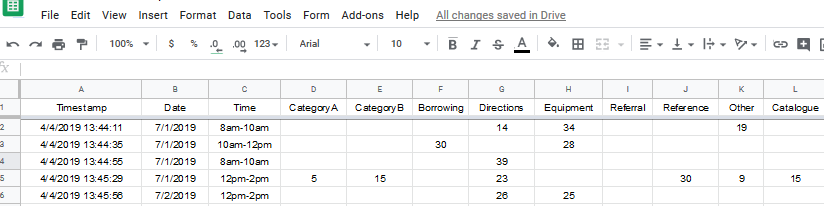

The following csv file is an exported version of the Google Spreadsheet above, and shows the statistics have been collected over six different time periods each day. Each submission details the date, time of day period, and a column for each enquiry category with a random generated tally.

So, let's begin by importing the raw statistics into the Python environment.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/drewfrobot/data-literacy-workshops/master/Hypothetical_Library_Queries.csv')
df = df.fillna(0)
df.sort_values(['Date','Time']).head(10)

They are a classic example of a wide, response data format.  Easily read by people, not so easily read by machines eg Skynet.

The categories of each interaction each have their own column.  It is a presentation format, once again easy for people to read but for a machine to read and perform an analysis and to take advantage of powerful analysis tools it needs to be converted to tall or long or narrow format.

This can easily be achieved for example using a 'melt' function in the pandas library.

In [ ]:
df2=pd.melt(df,id_vars=['Date','Time'],var_name='TypeOf', value_name='NumberOf').dropna()
df2.sort_values(['Date','Time']).head(20)

The narrow format is often referred to as EAV or Entity-attribute-value format. Here the entity is the date/time period event, and the attribute is the query category. Every line is simply an entity with an attribute and a value, which is much easier for machines to deal with.

Now we can perform an analysis and present results. Let's say we would like to know on average which time periods on which weekdays are the busiest at the enquiries desk. Firstly, let's convert the Date column to Date format and add a column which gives the day of the week.  Here 0 is Monday and 6 is Sunday. The day of the week will become part of the entity component.

In [ ]:
df2['Date']=pd.to_datetime(df2['Date'],format=("%m/%d/%Y"))
df2['day_of_week']=(df2['Date'].dt.dayofweek+1)%7
df2.sort_values(['Date','Time']).head(10)

Now we can perform an aggregation to find the average (median) number of interactions per day of week and time period. Here we pivot the data back into a wide format for people to view the summary or result.

In [ ]:
df3=df2.groupby(['Date','Time','day_of_week']).agg({'NumberOf':'sum'})[['NumberOf']].reset_index()
df4=df3.groupby(['Time','day_of_week']).agg({'NumberOf':'median'})[['NumberOf']].reset_index()
df5=df4.pivot_table(index='Time', columns='day_of_week',values='NumberOf').reset_index()
df5

Let's do a quick, no no nonsense graph to display the table.

In [ ]:
plt.rcParams['figure.figsize'] = [15, 8]
plt.style.use('ggplot')
df5.plot(kind='bar')

What if we wanted to show the interactions for each category over a particular month, say March 2018.

The raw data is hidden away in a table, there's no real need to look at it constantly, we can simply pose different questions and run any subsequent analysis without changing the raw data.

Here is a table view of the interactions per category for March 2018.  Here we once again pivot the data back into a wide format to view the results.

In [ ]:
df6=df2.loc[(df2['Date'].dt.month == 3) & (df2['Date'].dt.year == 2018) ].reset_index()
df7=df6.groupby(['Date','TypeOf']).agg({'NumberOf':'sum'})[['NumberOf']].reset_index()
df8=df7.pivot_table(index='TypeOf', columns='Date').reset_index()
df8

Once again, let's do a quick, no nonsense graph to display the table.

In [ ]:
df9=df6.loc[df6['TypeOf'].isin(['Catalogue','Reference'])].reset_index()
df10=df9.groupby(['Date','TypeOf']).agg({'NumberOf':'sum'})[['NumberOf']].reset_index()
plt.rcParams['figure.figsize'] = [15, 8]
plt.style.use('ggplot')
df10.pivot_table(index='Date', columns='TypeOf').plot(kind='line')

So in summary, wide format, whilst ideal for survey responses and displaying data to people, is not an ideal format to work with when using data analysis tools, such as Python and Pandas.  Converting to narrow data format allows the use of very powerful tools, and then the results can be pivoted or recast back into a wide format which is then easy for people to read and ponder.